# PHYS2113 Laboratory: Speed of Light

The aim of this experiment is to determine the speed of light in air, acrylic and water.

The apparatus consists of a modulated laser source and detector mounted at one end of a rail, with a movable reflector on the rail reflecting the beam back to the detector. By using an oscilloscope to examine the incoming and outgoing signals, one can determine the difference in time taken for the light to return to the detector, relative to a baseline used to calibrate the source/detector.

In [3]:
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
from os import mkdir
from os.path import exists
from scipy.optimize import curve_fit

In [2]:
plt.rcParams.update({'font.size': 14})

## In Air

In this part, the source/detector was calibrated with the reflector at '0' on the horizontal scale. The reflector was moved back in increments of 50 mm and the time difference between the pulses of the outgoing and incoming signals was measured using the oscilloscope at each position. 

A linear relationship $$\Delta s = c \Delta t$$ is expected between the additional distance travelled $\Delta s$ and the time taken $\Delta t$, where $c$ is the speed of light. $c$ can be determined using a simple linear fit of $\Delta s$ vs. $\Delta t$, as shown below.

In [113]:
filename = '../data/20210531_air.csv'
fig_path = '../report/figures/'
if not exists(fig_path):
    mkdir(fig_path)
df = read_csv(filename)
data = {}
for parameter in df.columns:
    data[parameter] = df[parameter].to_numpy()

In [117]:
length = data['x'] * 1e-3 * 2  # distance travelled in m
time = data['t'] * 1e-9 / 1e3  # time taken in s
length_sigma = 1e-3 * 2
time_sigma = 20e-9 / 1e3
c = 299792458

In [115]:
def line(x, slope, intercept):
    return x * slope + intercept

In [116]:
params, covariance = curve_fit(line, time, length)
fit = line(time, *params)
slope = params[0]
slope_sigma = np.sqrt(np.diag(covariance))[0]
intercept = params[1]
intercept_sigma = np.sqrt(np.diag(covariance))[1]

[Text(0.5, 0, 'Time (s)'),
 Text(0, 0.5, 'Distance (m)'),
 Text(0.5, 1.0, 'Speed of Light in Air')]

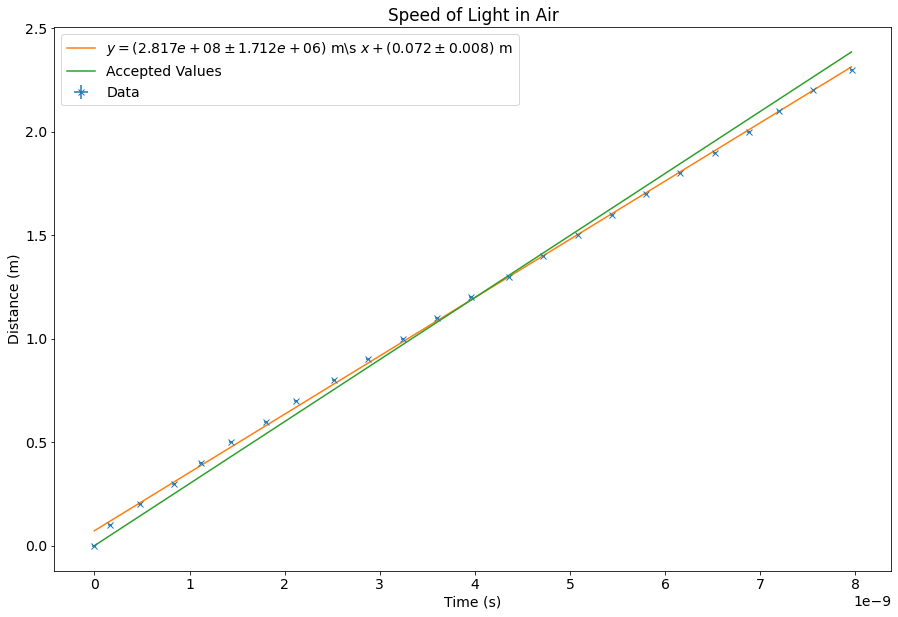

In [126]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.errorbar(
    time, 
    length, 
    marker='x',
    linestyle='',
    label='Data',
    xerr=time_sigma,
    yerr=length_sigma)
ax.plot(
    time, 
    fit, 
    label=r'$y = ({0:.3e} \pm {1:.3e})$ m\s $x + ({2:.3f} \pm {3:.3f})$ m'.format(slope, slope_sigma, intercept, intercept_sigma))
ax.plot(
    time,
    c * time,
    label='Accepted Values')
ax.legend()
ax.set(
    xlabel='Time (s)',
    ylabel='Distance (m)',
    title='Speed of Light in Air')

The accepted value of $c$ lies well outside the uncertainty range of the measured value. This suggests some combination of the actual time being shorter than the measured time, and the actual distance travelled being longer than what is suggested by the scale. It is suspected that the latter is the primary source of error, due to the possibility of the beam being poorly aligned and not taking the shortest straight path from source to reflector and back.

The presence of a 0.072 +/- 0.008 m offset in the linear fit also suggests some sort of systematic distance error, perhaps due to improper calibration or a drift over time. It was noticed that returning the reflector to the zero position after a few minutes did not result in a reading of zero time difference.

## In Acrylic

In this part, an acrylic rod with length 490 mm was placed in the path of the laser. The source/detector was calibrated for a known initial position of the reflector; the rod was then removed and the reflector moved back until the oscilloscope showed a zero time difference, i.e. that the optical path lengths before and after removing the rod were equal. The final position of the reflector was recorded and the same procedure repeated for a range of initial reflector positions, each 50 mm apart.

It is expected that the refractive index $n$ of the acrylic is given by
$$ n = \frac{\Delta x + l_m}{l_m}, $$
where $\Delta x$ is the difference between the final and initial reflector positions and $l_m$ is the length of the rod.

In [127]:
df = read_csv('../data/20210531_acrylic.csv')
data = {}
for parameter in df.columns:
    data[parameter] = df[parameter].to_numpy()

In [128]:
rod_length = 0.49
c = 299792458
initial = data['initial'] * 1e-3
final = data['final'] * 1e-3

In [129]:
measured_speed = c * rod_length / (final - initial + rod_length)
measured_n = c / measured_speed

In [131]:
c_acrylic = np.mean(measured_speed)
c_acrylic_sigma = np.std(measured_speed)
n_acrylic = np.mean(measured_n)
n_acrylic_sigma = np.std(measured_n)
accepted_n = 1.49
accepted_c = c / accepted_n
print('n = {0:.3f} +/- {1:.3f}, c = ({2:.3e} +/- {3:.3e}) m/s'.format(n_acrylic, n_acrylic_sigma, c_acrylic, c_acrylic_sigma))

n = 1.445 +/- 0.013, c = (2.075e+08 +/- 1.830e+06) m/s


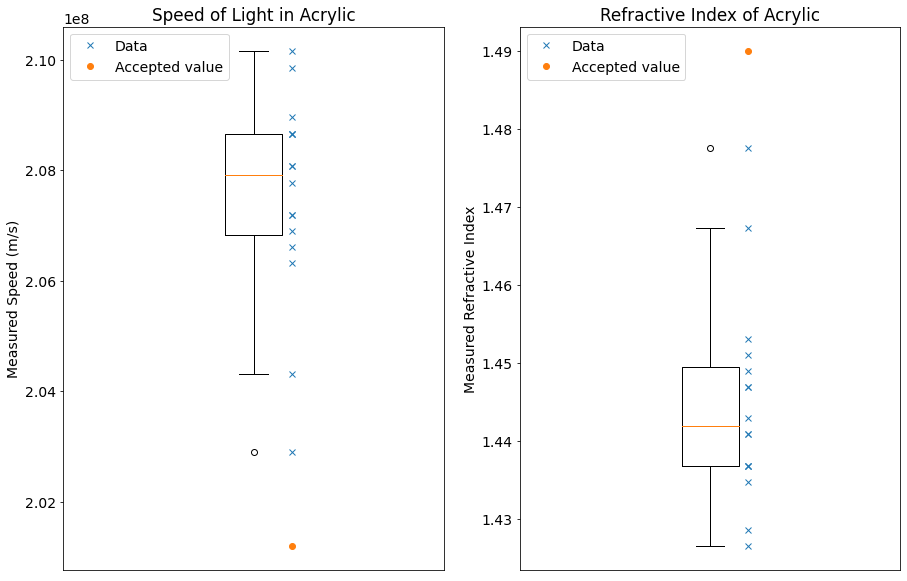

In [112]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(121)
ax1.boxplot(measured_speed)
ax1.plot(np.ones(len(measured_speed))*1.1, measured_speed, 'x', label='Data')
ax1.plot(1.1, accepted_c, 'o', label='Accepted value')
ax1.legend()
ax1.set(
    ylabel='Measured Speed (m/s)',
    title='Speed of Light in Acrylic')
ax1.axes.get_xaxis().set_visible(False)

ax2 = fig.add_subplot(122)
ax2.boxplot(measured_n)
ax2.plot(np.ones(len(measured_n))*1.1, measured_n, 'x', label='Data')
ax2.plot(1.1, accepted_n, 'o', label='Accepted value')
ax2.legend()
ax2.set(
    ylabel='Measured Refractive Index',
    title='Refractive Index of Acrylic')
ax2.axes.get_xaxis().set_visible(False)

The fact that the accepted refractive index is larger than the measured one and well outside the uncertainty range suggests that either the rod was shorter than 0.49 m or some factor caused $\Delta x$ to be smaller than it should have been.

## In Water

The procedure in this part was the same as the one used for acrylic, this time using a 500 mm cylinder filled with water.

It was noticed that the time delay shown by the oscilloscope varied significantly if the cylinder was rotated in its holder. This suggests that the ends of the cylinder were not completely parallel, causing the laser beam to travel a varying distance through the water.

In [132]:
df = read_csv('../data/20210531_water.csv')
data = {}
for parameter in df.columns:
    data[parameter] = df[parameter].to_numpy()

In [133]:
rod_length = 0.5
c = 299792458
initial = data['initial'] * 1e-3
final = data['final'] * 1e-3

In [134]:
measured_speed = c * rod_length / (final - initial + rod_length)
measured_n = c / measured_speed

In [135]:
c_water = np.mean(measured_speed)
c_water_sigma = np.std(measured_speed)
n_water = np.mean(measured_n)
n_water_sigma = np.std(measured_n)
accepted_n_water = 1.333
accepted_c_water = c / accepted_n_water
print('n = {0:.3f} +/- {1:.3f}, c = ({2:.3e} +/- {3:.3e}) m/s'.format(n_water, n_water_sigma, c_water, c_water_sigma))

n = 1.269 +/- 0.007, c = (2.362e+08 +/- 1.290e+06) m/s


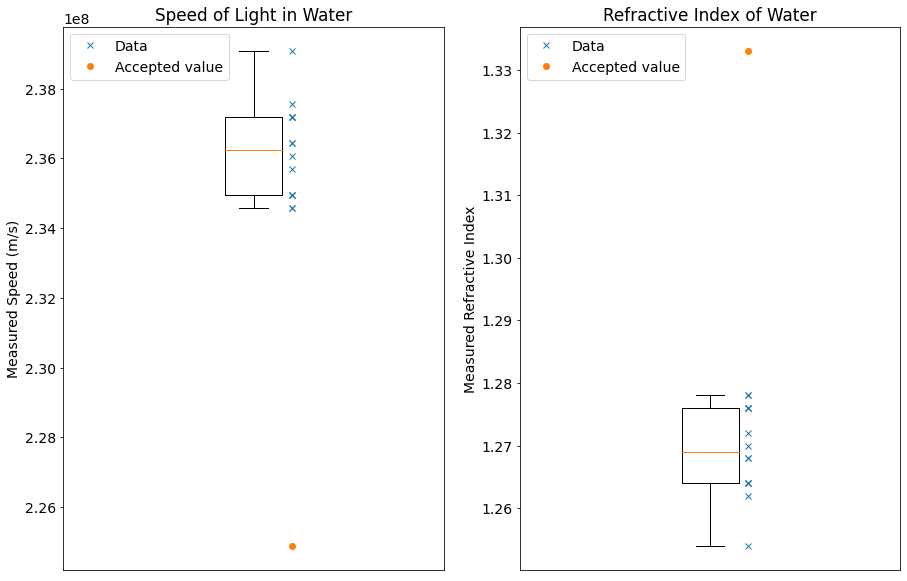

In [104]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(121)
ax1.boxplot(measured_speed)
ax1.plot(np.ones(len(measured_speed))*1.1, measured_speed, 'x', label='Data')
ax1.plot(1.1, accepted_c, 'o', label='Accepted value')
ax1.legend()
ax1.set(
    ylabel='Measured Speed (m/s)',
    title='Speed of Light in Water')
ax1.axes.get_xaxis().set_visible(False)

ax2 = fig.add_subplot(122)
ax2.boxplot(measured_n)
ax2.plot(np.ones(len(measured_n))*1.1, measured_n, 'x', label='Data')
ax2.plot(1.1, accepted_n, 'o', label='Accepted value')
ax2.legend()
ax2.set(
    ylabel='Measured Refractive Index',
    title='Refractive Index of Water')
ax2.axes.get_xaxis().set_visible(False)

Again, the fact that the accepted refractive index is larger than the measured one and well outside the uncertainty range suggests that either the rod was shorter than 0.49 m or some factor caused $\Delta x$ to be smaller than it should have been.

## Discussion

### Sources of Uncertainty
 - Inhomogeneity or imperfect shape of the acrylic rod and water cylinder (major)
 - Imperfect alignment of the laser and reflector (major)
 - Aligning the reflector with the horizontal scale by eye (minor)
 - Resolution in time measurements on the oscilloscope (very minor)
 
### Ideas and Questions
 - When measuring $c$ in air, calibrating the meter with the reflector at the zero position before every measurement may help eliminate the observed offset.
 - We should fix the orientation and position of the rod and cylinder to prevent rotation between successive measurements. This could be done by making temporary marks on them and aligning these with marks on the holders.
 - It would be good to measure the lengths of the materials ourselves rather than relying on the values supplied by the manufacturers. It should be simple to do this for the acrylic, but the water cylinder has caps that protrude past the end of the water section.
 - Instead of moving the reflector to measure $\Delta x$ for acrylic and water, we could fix the reflector and just measure the time difference with and without the materials present. The time difference would be $ \Delta t = \frac{l}{c_m} - \frac{l}{c}$.
 - Another way to measure the refractive index would be to vary the length of the rods, but we only have one length available.
 - Would it be valuable to repeat the experiment with the apparatus oriented 90 degrees to the initial position to demonstrate that $c$ is independent of direction? Or is this too trivial?
 
### Plans for Week 4
 - Re-do measurements after carefully aligning reflector and fixing position of acrylic and water.
 - Try measuring time difference for acrylic and water rather than path length difference
 - Make sure axis of cylinders are parallel to beam using string or crosshairs on ends
 - Rotate cylinders 180 degrees at each step and average pair of measurements
 - Measure lengths of cylinders